# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Кардаш Ярослав вариант №9

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем ком-
пьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Рассмотрим задачу вычисления одночленов за минимальное количество операций


### Бинарный метод SX
Ход работы алгоритма:
<ol>
<li> Представим некоторое натуральное число n в бинарном виде, т.е. 
    $n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$, причем $a_{m} = 1$
<li> Отбросим старший бит $a_{m}$
<li> Заменим: $a_{i} = $SX$,  $если: 
    $a_{i} = $1 <br>
    $a_{i} = $S$, $если:
    $a_{i} = $0 
<li> Теперь пройти по получившейся записи и выполнить следующие вычисления: <br>
    Если $a[i]$ == $S$: $x = x^2$ <br>
    Если $a[i]$ == $X$: $x = x*x$ <br>
</ol>
Для алгоритма справедлива следующая оценка числа операций: <br>
$iter$ = $\lambda(n)$ + $\nu(n)$ - $1$ <br>
Где $\lambda(n)$ - уменьшенная на 1 длина бинарной записи числа <br>
$\nu(n)$ - вес Хэмминга - количество единиц в бинарной записи числа

    Результат работы алгоритма - ответ на поставленную задачу


    
### Бинарный метод возведения справа налево 
Ход работы алгоритма:
<ol>
    <li> Присвоим $N = n$ $Y =1$ $Z = x$ <br> где n степень, в которую нужно возвести число, x -  число
     <li> Если N четно, $N = N/2$, $Z = Z^2$ <br>
         Иначе $N = floor(N)$ (округление вниз), $Y = Z*Y$. Если $N == 0$ то возвращаем Y, иначе $Z = Z^2$
      <li> Пункт 2 повторяется (до тех пор пока $N$ $\not=$ $0$ т.е. пока не будет возвращен $Y) 

Для алгоритма справедлива следующая оценка числа операций: <br>
$iter$ = $\lambda(n)$ + $\nu(n)$ <br>
Где $\lambda(n)$ - уменьшенная на 1 длина бинарной записи числа <br>
$\nu(n)$ - вес Хэмминга - количество единиц в бинарной записи числа

### Метод множителей
Ход работы алгоритма:
<ol>
    1. Представим степень n как $n = p*q$ где $p$ - минимальный простой множитель n, $q>1$
          Тогда $x^n$ = $ x^{n^{q}}$ <br>
    2. Если $x^n$ -  простое, $x^n = x^{n-1} * x$ 
       При $ n = 1$ $x^n = x$
       Если $x^n$ не простое, продолжаем раскладывать его как указано в шаге 1. 

### Дерево степеней
Ход построения дерева степеней:
<ol>
    1. Корневой элемент дерева = 1 <br>
    2. Далее уровни строятся следующим образом: <br>
       к каждой вершине k уровня пристраиваются дочерние узлы k+1 уровня такие, что их можно получить с помощью значений вершин, стоящих строго выше в дереве. <br>
    3. Уже добавленные узлы повторно в дерево не добавляются

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Бинарный метод SX

Реализация алгоритма SX в методе sx_alg(grade) <br>
На вход подается натуральное число grade - степень, в которую необходимо возвести число <br>
Согласно алгоритму сперва получается SX представление число (выводится на экран), затем в цикле число возводится в степень. Каждый шаг итерации также выводится на экран. Метод возвращает кортеж из числа операций и возведенного в степень числа

In [1]:
#реализация алгоритма SX
def sx_alg(grade):
    res = var('x')
    bin_note = str(bin(grade)[3:]) #первые два символа - 0b, третий - первый бит числа
    bin_note = bin_note.replace('1','SX').replace('0','S')
    print(bin_note)
    counter = 0
    for letters in bin_note:
        if letters == 'S':
            res= res*res
        elif letters == 'X':
            res *= x
        counter+=1
        print(str(counter) +':',res,end=' ')
    print()
    return counter,res

Протестируем метод, передав ему некоторые значения степени

In [2]:
print(sx_alg(17))

SSSSX
1: x^2 2: x^4 3: x^8 4: x^16 5: x^17 
(5, x^17)


In [3]:
print(sx_alg(39))

SSSXSXSX
1: x^2 2: x^4 3: x^8 4: x^9 5: x^18 6: x^19 7: x^38 8: x^39 
(8, x^39)


In [4]:
print(sx_alg(54))

SXSSXSXS
1: x^2 2: x^3 3: x^6 4: x^12 5: x^13 6: x^26 7: x^27 8: x^54 
(8, x^54)



#### Вывод
Реализован метод SX, позволяющий эффективно возводить одночлен в степень. 
Этот алгоритм позволяет возводить мономы в степень гораздо быстрее, чем методы последовательного умножения.
Из хода работы алгоритма можно установить, что он более эффективен для чисел, в бинарной записи которого мало единиц.

### 2. Метод возведения справа налево

В методе rl_alg реализуется алгоритм возведения в степень справа налево

In [5]:
#реализиация алгоритма возведения в степень справа налево
def rl_alg(grade):
    N = grade
    Y = 1
    Z = var('x')
    counter = 0
    print(counter,N,Y,Z)
    while N != 0:
        if N%2 ==0: 
            N = N//2
            Z = Z*Z
        else:
            N = floor(N/2)
            Y = Z*Y
            if N==0:
                break
            else:
                Z = Z*Z
        counter+=1
        print(counter,N,Y,Z)
    print(counter+1,N,Y,Z)
    return Y



Протестируем метод такими же значениями, как и метод SX. Результаты представим в виде таблицы.

In [6]:
show(rl_alg(17))

0 17 1 x
1 8 x x^2
2 4 x x^4
3 2 x x^8
4 1 x x^16
5 0 x^17 x^16


x^17

Сформируем результат работы программы в виде таблицы <br>
N = 17 <br>


| № итерации | Значение N | Значение Y | Значение Z   | 
|:----------:|:----------:|:----------:|:----------:  | 
|      0     |     17     |    1       |      $x$     | 
|      1     |     8      |    $x$     |    $x^2$     | 
|      2     |     4      |    $x$     |     $x^4$    | 
|      3     |      2     |    $x$     |     $x^8$    | 
|      4     |      1     |    $x$     |    $x^{16}$  |
|      5     |      0     |    $x^{17}$|    $x^{16}$  |

In [7]:
show(rl_alg(39))

0 39 1 x
1 19 x x^2
2 9 x^3 x^4
3 4 x^7 x^8
4 2 x^7 x^16
5 1 x^7 x^32
6 0 x^39 x^32


x^39

Сформируем результат работы программы в виде таблицы <br>
N = 39 <br>


| № итерации | Значение N | Значение Y | Значение Z   | 
|:----------:|:----------:|:----------:|:----------:  | 
|      0     |     39     |    1       |      $x$     | 
|      1     |     19     |    $x$     |    $x^2$     | 
|      2     |      9     |    $x^3$   |     $x^4$    | 
|      3     |      4     |    $x^7$   |     $x^8$    | 
|      4     |      2     |    $x^7$   |    $x^{16}$  |
|      5     |      1     |    $x^7$   |    $x^{32}$  |
|      6     |      0     |    $x^{39}$|    $x^{32}$  |

In [8]:
show(rl_alg(54))

0 54 1 x
1 27 1 x^2
2 13 x^2 x^4
3 6 x^6 x^8
4 3 x^6 x^16
5 1 x^22 x^32
6 0 x^54 x^32


x^54

Сформируем результат работы программы в виде таблицы <br>
N = 54 <br>


| № итерации | Значение N | Значение Y | Значение Z   | 
|:----------:|:----------:|:----------:|:----------:  | 
|      0     |     54     |    1       |      $x$     | 
|      1     |     27     |    1       |    $x^2$     | 
|      2     |     13     |    $x^2$   |     $x^4$    | 
|      3     |      6     |    $x^6$   |     $x^8$    | 
|      4     |      3     |    $x^6$   |    $x^{16}$  |
|      5     |      1     |    $x^{22}$|    $x^{32}$  |
|      6     |      0     |    $x^{54}$|    $x^{32}$  |

Можно установить, что в общем случае значение $Z$ = $x^{2^{m-2}}$, <br>m - количество итераций в ходе работы алгоритма (нумерация итераций начинается с 0)


#### Вывод
Реализован алгоритм возведения в степень справа налево, результаты работы выведены в формате таблицы.
Этот алгоритм так же работает быстрее, чем методы последовательного умножения. <br>
Из оценки скорости работы алгоритма можно установить, что в общем случае он работает хуже алгоритма SX

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево

Исходя из оценки количества операций для методов:
метод SX выполняется за $\lambda(n)$ + $\nu(n)$ -$1$ операций <br>
Метод справа налево выполняется за $\lambda(n)$ + $\nu(n)$ операций <br>
Справедливость данной оценки можно наблюдать, сравнив число операций для обоих методов в соответствующих пунктах работы (для наглядности в качестве примеров для демонстрации работы алгоритмов были использованы одинаковые числа)

### 4. Метод множителей

Выполним метод множителей для чисел 17, 39, 54. Алгоритм приведен в разделе основных теоретических положений.

$n = 17$ <br>
$x^{17} = x^{16} *x$  1 операция <br>
$x^{16} = (x^2)^8 = ((x^2)^2)^4 = ((((x^2)^2)^2)^2)$  +3 операции (без получения $x^2$) <br>
$x^2 = x*x$ +1 операция <br>
Итого - 5 операций

n = 39 <br>
$x^{39} = (x^3)^{12} * x^3$ <br>
$x^{39} = x^3 * (((x^3)^2)^2)^3$ <br>
$x^3$ - 2 операции <br>
$(x^3)^2$ +1 операции <br>
$((x^3)^2)^2$  +1 операция <br>
$(((x^3)^2)^2)^3$ +2 операции <br>
$x^3 * (((x^3)^2)^2)^3$ +1 операция <br>

Итого - 7 операций.

n =54 <br>
$x^{54} = (x^2)^{27} = $ <br>
$ = ((x^2)^3)^9 = (((x^2)^3)^3)^3$ <br>
$ x^2 = x*x $ 1 операция <br>
$ (x^2)^3 $ +2 операции <br>
$ ((x^2)^3)^3 $ +2 операции <br>
$ (((x^2)^3)^3)^3$ +2 операции <br>
Итого 7 операций

Продемонстрируем также степень, при которой число операций в методе SX меньше, чем в методе множителей
n = 33
$x^{33} = (x^3)^{11} = (x^3) * (x^3)^{10} = (x^3) * ((x^3)^2)^5$ <br>
$ x^3 $ - 2 операции <br>
$ (x^3)^2 $ +1 операция <br>
$ ((x^3)^2)^5)$ +3 операции <br>
$ (x^3) *((x^3)^2)^5$ +1 операция <br>
 Итого 7 операций

In [9]:
print(sx_alg(33))

SSSSSX
1: x^2 2: x^4 3: x^8 4: x^16 5: x^32 6: x^33 
(6, x^33)



#### Вывод
Проанализирован и выполнен метод множителей. Установлено, что метод множителей может быть как быстрее, так и медленнее бинарного метода SX, в зависимости от количества единиц в бинарной записи числа.

### 5. Построение дерева степеней

В методе bulid_tree построим дерево степеней согласно алгоритму из теоретических положений. <br>
Дерево будет храниться в виде словаря, где ключ - элемент дерева, а значение - все предки данного ключа вплоть до корня. <br>
В цикле обходятся все родители каждого из детей на текущем уровне и таким образом формируется следующий уровень. Если элемент уже находится в дереве, повтороно он туда не включается.

In [10]:
def build_tree(level,is_decrease = False):
    tree = {1:[1]}
    children = [1]
    for lev_count in range(level):
        cur_children = []
        for child in children:
            for parent in tree[child]:
                new_child = child+parent
                if new_child not in tree.keys():
                    cur_children.append(new_child)
                    tree[new_child] = tree[child] + [new_child]
        children = cur_children
    return tree

В методе show_tree передадим созданное дерево и искому вершину, приведем дерево к виду графа в sage и отобразим его.

In [11]:
def show_tree(tree,node):
    if node not in tree:
        print("Данный узел находится ниже в дереве степеней")
        node = 1
    copy_tree = tree.copy()
    copy_tree.pop(1)
    show_tree = {}
    for key,parent in copy_tree.items():
        if not show_tree.get(parent[-2]):
            show_tree[parent[-2]] = [key]
        else:
            show_tree[parent[-2]].append(key)
    graph = Graph(show_tree)
    pict = graph.plot(layout='tree',tree_root=1,vertex_color = 'yellow', vertex_colors = {'lime': tree[node]})
    pict.show()

Протестируем методы, построив дерево до 5 уровня и получив путь до элемента 8

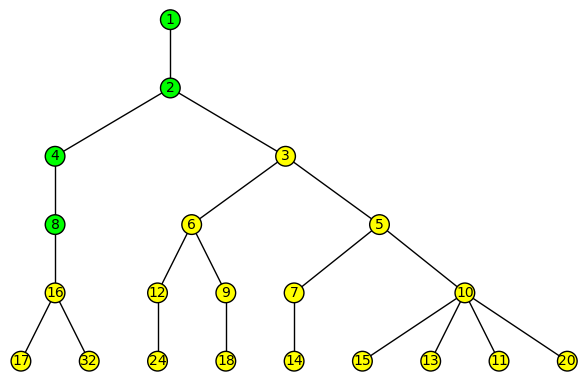

In [12]:
show_tree(build_tree(5),8)

Еще одна демонстрация - работа вплоть до 7 уровня и поиск элемента 37

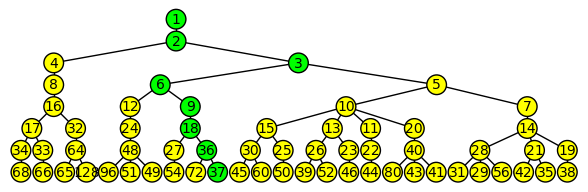

In [13]:
show_tree(build_tree(7),37)

Теперь сравним метод дерева степеней и SX алгоритм <br>
Для алгоритма SX количество операций = $\lambda(n)$ + $\nu(n)$ - $1$ <br>
Для метода дерева степеней достаточно вывести значение словаря с деревом по ключу искомой вершины

In [14]:
val = 37
print("количество итераций в дереве степеней", len(build_tree(7)[val])-1)
print("количество итераций в SX методе", floor(log(val, 2)) + bin(val)[2:].count('1') - 1)

количество итераций в дереве степеней 7
количество итераций в SX методе 7


Можно запустить цикл и проверить, что дерево степеней не проигрывает методу SX (количество операций не больше) вплоть до n = 1000

In [15]:
n = 1000
flag = True
for i in range(1,n):
    if len(build_tree(15)[i])-1 > floor(log(i, 2)) + bin(i)[2:].count('1') - 1:
        flag = False
        print(i)
        break
if flag:
    print("Утверждение верно")
else:
    print("Утверждение неверно")

Утверждение верно


#### Вывод
Реализован метод дерева степеней, в котором вплоть до некоторого уровня n строится дерево, отображающее то, как можно получить степени за наименьшее число шагов.
С помощью методов отрисовки sage по заданным параметрам уровня и искомой степени изображен график дерева, цветом отмечен путь от искомой вершины до корня.
Проверено вплоть до n = 1000, что метод степеней дает не большее количество операций, чем метод SX.
Среди преимуществ использования дерева степеней можно выделить то, что, построив дерево вплоть до некотого уровня, можно быстро найти любую степень, находящуюся на не превышающем заданного уровне.

## Выводы
Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем ком-
пьютерной математики для реализации алгоритмов.
Сформированы знания о работе вычисления одночленов за минимальное число операций, для реализации алгоритмов использована компьютерная система sage, использующая язык python.
Реализованы и протестированы алгоритмы SX и метод справа налево, изучен метод множителей (с его помощью вручную посчитаны значения), реализован метод дерева степеней.
Проверена работоспособность алгоритмов и верность оценок количества операций.
Произведено сравнение метода SX, метода справа налево и метода множителей, метода SX и метода дерева степеней, подтверждены теоретические утверждения о том, как соотносятся скорости их работы.